#Multiclass classification

##Reuters dataset

###Loading the Reuters dataset

In [ ]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)

###Decoding newswires back to text

In [ ]:
word_index = dict([(value, key) for (key, value) in reuters.get_word_index().items()])

def decode_review(orig_review):
  return ' '.join([word_index.get(i - 3, '?') for i in orig_review])

##Preparing the data

###Encoding the data

In [ ]:
import numpy as np

def vectorize_sequences(sequences, dimension = 10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

from keras.utils.np_utils import to_categorical

#Vectorizes the labels
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

##Building the network

###Model definition

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

###Compiling the model

In [ ]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics = ['accuracy'])

##Validating the approach

###Setting aside a validation set

In [ ]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

###Training the model

In [ ]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 71ms/step - loss: 2.5106 - accuracy: 0.5213 - val_loss: 1.6791 - val_accuracy: 0.6330
Epoch 2/20
16/16 [==============================] - 1s 63ms/step - loss: 1.3873 - accuracy: 0.7031 - val_loss: 1.2823 - val_accuracy: 0.7100
Epoch 3/20
16/16 [==============================] - 1s 64ms/step - loss: 1.0307 - accuracy: 0.7756 - val_loss: 1.1407 - val_accuracy: 0.7540
Epoch 4/20
16/16 [==============================] - 1s 62ms/step - loss: 0.8075 - accuracy: 0.8296 - val_loss: 1.0149 - val_accuracy: 0.7950
Epoch 5/20
16/16 [==============================] - 1s 51ms/step - loss: 0.6396 - accuracy: 0.8666 - val_loss: 0.9542 - val_accuracy: 0.8100
Epoch 6/20
16/16 [==============================] - 1s 77ms/step - loss: 0.5074 - accuracy: 0.8968 - val_loss: 0.9480 - val_accuracy: 0.8000
Epoch 7/20
16/16 [==============================] - 2s 107ms/step - loss: 0.4117 - accuracy: 0.9146 - val_loss: 0.9405 - val_accuracy: 0.8070
Epoch 8/20
1

###Plot the training and validation loss

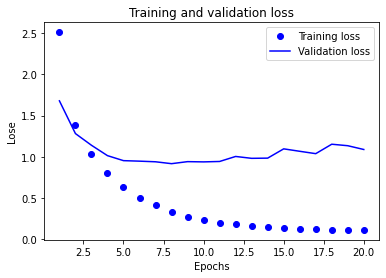

In [ ]:
import matplotlib.pyplot as plt


history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Lose')
plt.legend()

plt.show()

###Plot the training and validation accuracy

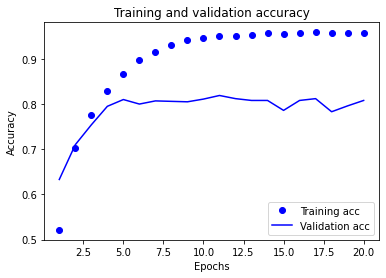

In [ ]:
plt.clf()
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

###Retrain model from scratch with new epochs

In [ ]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics = ['accuracy'])

model.fit(x_train, one_hot_train_labels, batch_size=512, epochs=9)

results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
18/18 [==============================] - 1s 49ms/step - loss: 2.5581 - accuracy: 0.5262
Epoch 2/9
18/18 [==============================] - 1s 46ms/step - loss: 1.3957 - accuracy: 0.7111
Epoch 3/9
18/18 [==============================] - 1s 45ms/step - loss: 1.0399 - accuracy: 0.7771
Epoch 4/9
18/18 [==============================] - 1s 47ms/step - loss: 0.8167 - accuracy: 0.8288
Epoch 5/9
18/18 [==============================] - 1s 55ms/step - loss: 0.6486 - accuracy: 0.8667
Epoch 6/9
18/18 [==============================] - 1s 47ms/step - loss: 0.5202 - accuracy: 0.8927
Epoch 7/9
18/18 [==============================] - 1s 45ms/step - loss: 0.4182 - accuracy: 0.9145
Epoch 8/9
18/18 [==============================] - 1s 54ms/step - loss: 0.3456 - accuracy: 0.9284
Epoch 9/9
71/71 [==============================] - 0s 5ms/step - loss: 0.9501 - accuracy: 0.7912


##Generating predictions on new data

In [ ]:
predictions = model.predict(x_test)

In [ ]:
#Get the max probability
idx = 12
predictions[idx][np.argmax(predictions[idx])]

#In case of using integer tensor for labels (y_train = np.array(train_labels)) instead of to_categorical, you need to use loss = 'sparse_categorical_crossentropy'

0.97500813